In [29]:
%load_ext nb_black
%load_ext lab_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

In [30]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    MaxPooling2D,
    Activation,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [31]:
PATH = "cats_and_dogs"

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")
test_dir = os.path.join(PATH, "test")

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

<IPython.core.display.Javascript object>

In [32]:
train_image_generator = ImageDataGenerator(rescale=1.0 / 255)
validation_image_generator = ImageDataGenerator(rescale=1.0 / 255)
test_image_generator = ImageDataGenerator(rescale=1.0 / 255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size
)
test_data_gen = test_image_generator.flow_from_directory(
    test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), shuffle=False, batch_size=batch_size
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


<IPython.core.display.Javascript object>

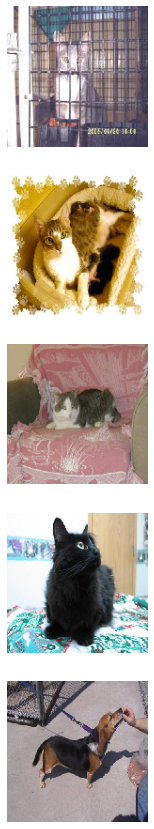

<IPython.core.display.Javascript object>

In [33]:
def plotImages(images_arr, probabilities=False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
    if probabilities is False:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis("off")
    else:
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis("off")
            if probability > 0.5:
                ax.set_title("%.2f" % (probability * 100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1 - probability) * 100) + "% cat")
    plt.show()


sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [34]:
train_image_generator = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4, 1.5],
    zoom_range=0.3,
    rescale=1.0 / 255,
)

<IPython.core.display.Javascript object>

Found 2000 images belonging to 2 classes.


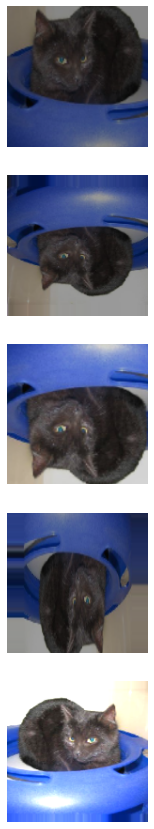

<IPython.core.display.Javascript object>

In [35]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary",
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [37]:
history = model.fit(
    train_data_gen, epochs=epochs, validation_data=val_data_gen, batch_size=batch_size
)

Epoch 1/15
16/16 [==============================] - 37s 2s/step - loss: 0.2553 - accuracy: 0.5120 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 36s 2s/step - loss: 0.2489 - accuracy: 0.5260 - val_loss: 0.2503 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 37s 2s/step - loss: 0.2473 - accuracy: 0.5550 - val_loss: 0.2528 - val_accuracy: 0.5000
Epoch 4/15
16/16 [==============================] - 36s 2s/step - loss: 0.2400 - accuracy: 0.5850 - val_loss: 0.2595 - val_accuracy: 0.5000
Epoch 5/15
16/16 [==============================] - 40s 2s/step - loss: 0.2362 - accuracy: 0.5870 - val_loss: 0.2679 - val_accuracy: 0.5000
Epoch 6/15
16/16 [==============================] - 39s 2s/step - loss: 0.2258 - accuracy: 0.6315 - val_loss: 0.2788 - val_accuracy: 0.5000
Epoch 7/15
16/16 [==============================] - 36s 2s/step - loss: 0.2242 - accuracy: 0.6335 - val_loss: 0.2843 - val_accuracy: 0.5000
Epoch 8/15
16/16 [==

<IPython.core.display.Javascript object>

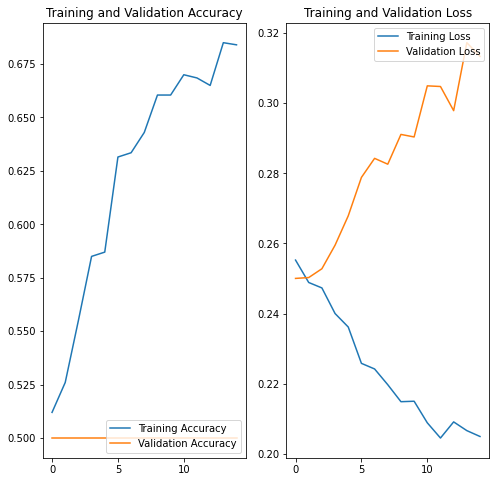

<IPython.core.display.Javascript object>

In [38]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [39]:
probabilities = model.predict(test_data_gen)
probabilities = np.array(probabilities).reshape(len(probabilities))
probabilities = probabilities.round().astype(np.int0)

<IPython.core.display.Javascript object>

In [42]:
answers = [
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
]

correct = 0

for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
        correct += 1

percentage_identified = correct / len(answers)

passed_challenge = percentage_identified > 0.63

print(
    f"Your model correctly identified {round(percentage_identified, 4)*100}% of the images of cats and dogs."
)

if passed_challenge:
    print("You passed the challenge!")
else:
    print(
        "You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!"
    )

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!


<IPython.core.display.Javascript object>